# Tobit vs. OLS example

In [1]:
from use import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import random

In [4]:
# Generate 'random' data
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 10  # Array of 100 values with mean = 10, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                  # Actual values of Y

In [5]:
censura = np.zeros(100)+ 6.5

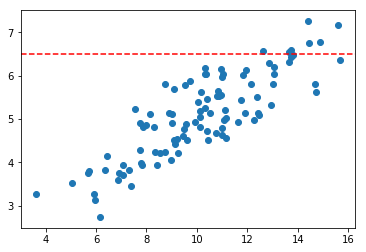

In [6]:
plt.scatter(X,y)
plt.axhline(censura[0],color='r',ls='--')

In [7]:
# random dummies
dummies = ["V1","V2"]

list_dummies = []
for i in range(100):
    random.shuffle(dummies)
    list_dummies.append(dummies[0])

In [8]:
database = pd.DataFrame([X,y,censura,list_dummies]).T
database.columns = ["X","y","censura","dummie"]

In [9]:
database.head()

,X,y,censura,dummie
0,14.4101,7.26461,6.5,V2
1,11.0004,4.62624,6.5,V1
2,12.4468,5.09881,6.5,V2
3,15.6022,7.16537,6.5,V2
4,14.6689,5.81411,6.5,V1


In [24]:
model = apply_models(data         = database,
                     column_y     = "y",
                     numeric1_min = 5,
                     numeric1_max = 20,
                     cols_numeric = ["X"],
                     cols_dummies = ["dummie"],
                     col_censura  = "censura",
                     limit_inf    = 4,
                     show         = True)

In [25]:
model.create_X_to_predict()

Sample =  32
Dict. Possible Solutions =  {'X': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'dummie': ['V2', 'V1']}


In [26]:
model.create_X_variables()

In [27]:
model.X.head()

,X,dummie_V1,dummie_V2,cte
0,14.4101,0,1,0.01
1,11.0004,1,0,0.01
2,12.4468,0,1,0.01
3,15.6022,0,1,0.01
4,14.6689,1,0,0.01


In [28]:
model.X2predict.head()

,X,dummie
0,5,V2
1,5,V1
2,6,V2
3,6,V1
4,7,V2


In [29]:
ols_model = model.apply_OLS()

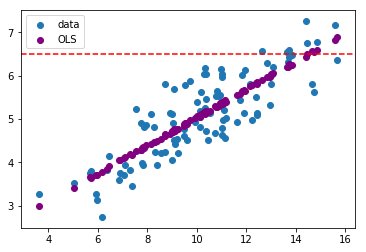

In [30]:
plt.scatter(X,y,label="data")
plt.scatter(X,ols_model.fittedvalues,color="purple",label="OLS")
plt.axhline(censura[0],color='r',ls='--')
plt.legend()

In [31]:
tobit_model = model.apply_tobit()

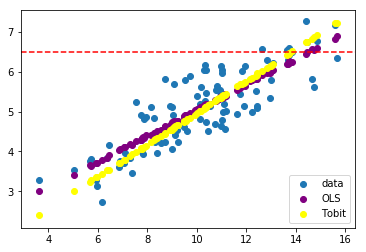

In [32]:
plt.scatter(X,y,label="data")
plt.scatter(X,model.fit_ols_predictions ,color="purple",label="OLS")
plt.scatter(X,model.fit_tobit_predictions,color="yellow",label="Tobit")
plt.axhline(censura[0],color='r',ls='--')
plt.legend()

In [33]:
model.data.head()

,X,y,censura,dummie,censura_fit
0,14.4101,7.264615,6.5,V2,1.0
1,11.0004,4.626238,6.5,V1,0.0
2,12.4468,5.098811,6.5,V2,0.0
3,15.6022,7.165368,6.5,V2,1.0
4,14.6689,5.814107,6.5,V1,0.0


In [34]:
model.predict_values(mode="ols",show=True)

In [35]:
pd.concat([model.X2predict,model.solucao_ols,model.solucao_ols_iv_l,model.solucao_ols_iv_u],axis=1).head()

,X,dummie,0,1,2
0,5,V2,3.404039,2.338130,4.469948
1,5,V1,3.444941,2.377447,4.512436
2,6,V2,3.726745,2.668116,4.785374
3,6,V1,3.767648,2.707654,4.827641
4,7,V2,4.049451,2.996548,5.102354


In [36]:
database

,X,y,censura,dummie,censura_fit
0,14.4101,7.264615,6.5,V2,1.0
1,11.0004,4.626238,6.5,V1,0.0
2,12.4468,5.098811,6.5,V2,0.0
3,15.6022,7.165368,6.5,V2,1.0
4,14.6689,5.814107,6.5,V1,0.0
5,7.55681,5.238852,6.5,V1,0.0
6,12.3752,5.505757,6.5,V1,0.0
7,9.62161,4.512755,6.5,V2,0.0
8,9.74195,5.884057,6.5,V1,0.0
9,11.0265,6.048206,6.5,V2,0.0
